In [1]:
!pip install ultralytics==8.0.196

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [1]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="gE66dB5HoMJrh6P7OtPT")
project = rf.workspace("mohammadjalkhatib").project("chess_dataset_topview")
version = project.version(1)
dataset = version.download("yolov8")

mkdir: cannot create directory ‘{HOME}/datasets’: No such file or directory
[Errno 2] No such file or directory: '{HOME}/datasets'
/content
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Chess_Dataset_TopView-1 in yolov8:: 100%|██████████| 842/842 [00:00<00:00, 4811.10it/s]


In [2]:
from ultralytics import YOLO

model = YOLO('best.pt')  # pretrained YOLOv8x model

In [3]:
results = model.predict(source='/content/Chess_Dataset_TopView-1/test/images/IMG_20240310_213212_jpg.rf.dbab87c800b284bbf79ea153f8e73b8e.jpg', conf=0.25)


image 1/1 /content/Chess_Dataset_TopView-1/test/images/IMG_20240310_213212_jpg.rf.dbab87c800b284bbf79ea153f8e73b8e.jpg: 640x640 2 Black_Bishops, 1 Black_King, 2 Black_Knights, 5 Black_Pawns, 1 Black_Rook, 1 Chess_Board, 1 White_King, 2 White_Pawns, 1 White_Queen, 4406.7ms
Speed: 5.4ms preprocess, 4406.7ms inference, 28.2ms postprocess per image at shape (1, 3, 640, 640)


In [4]:
results = model('/content/Chess_Dataset_TopView-1/test/images/IMG_20240310_213212_jpg.rf.dbab87c800b284bbf79ea153f8e73b8e.jpg')


image 1/1 /content/Chess_Dataset_TopView-1/test/images/IMG_20240310_213212_jpg.rf.dbab87c800b284bbf79ea153f8e73b8e.jpg: 640x640 2 Black_Bishops, 1 Black_King, 2 Black_Knights, 5 Black_Pawns, 1 Black_Rook, 1 Chess_Board, 1 White_King, 2 White_Pawns, 1 White_Queen, 4031.4ms
Speed: 3.0ms preprocess, 4031.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


In [5]:
# View results
for r in results:
    print(r.boxes)  # print the Boxes object containing the detection bounding boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 6., 11.,  2., 10.,  3.,  5., 10.,  0.,  3.,  0.,  3.,  3.,  8.,  1.,  3.,  2.])
conf: tensor([0.9591, 0.9392, 0.9344, 0.9310, 0.9230, 0.9165, 0.9067, 0.9033, 0.8998, 0.8977, 0.8955, 0.8925, 0.8914, 0.8677, 0.8618, 0.6034])
data: tensor([[ 70.7570,  52.1409, 601.3389, 582.9877,   0.9591,   6.0000],
        [127.9172,  33.2876, 199.0643, 107.7945,   0.9392,  11.0000],
        [341.7508, 327.2249, 394.6735, 377.6862,   0.9344,   2.0000],
        [470.9872, 463.4193, 519.1141, 513.9709,   0.9310,  10.0000],
        [415.8793, 140.6324, 460.4058, 187.6954,   0.9230,   3.0000],
        [ 70.7970, 449.7492, 136.4612, 510.3433,   0.9165,   5.0000],
        [535.9871, 334.9013, 590.8097, 380.5500,   0.9067,  10.0000],
        [277.1764, 259.7386, 326.7047, 313.6688,   0.9033,   0.0000],
        [480.4073, 201.9245, 528.2758, 246.0804,   0.8998,   3.0000],
        [210.6283, 263.4660, 265.2715, 316.2093,   0.8977,   0.0000],


0: 640x640 2 Black_Bishops, 1 Black_King, 2 Black_Knights, 5 Black_Pawns, 1 Black_Rook, 1 Chess_Board, 1 White_King, 2 White_Pawns, 1 White_Queen, 4972.7ms
Speed: 3.1ms preprocess, 4972.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


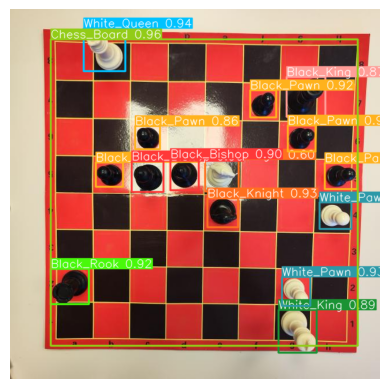

In [6]:
from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt


# Run inference on test image
results = model(['/content/Chess_Dataset_TopView-1/test/images/IMG_20240310_213212_jpg.rf.dbab87c800b284bbf79ea153f8e73b8e.jpg'])  # results list

# Visualize the results
for i, r in enumerate(results):
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

    # Display the results using matplotlib
    plt.imshow(im_rgb)
    plt.axis('off')
    plt.show()

    # # Save results to disk
    # r.save(filename=f'results{i}.jpg')

#Labels to FEN


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Initialize YOLO model
model = YOLO('best.pt')

# Load image
image = cv2.imread('/content/Chess_Dataset_TopView-1/test/images/IMG_20240310_213212_jpg.rf.dbab87c800b284bbf79ea153f8e73b8e.jpg')

# Perform object detection
results = model('/content/Chess_Dataset_TopView-1/test/images/IMG_20240310_213212_jpg.rf.dbab87c800b284bbf79ea153f8e73b8e.jpg')


image 1/1 /content/Chess_Dataset_TopView-1/test/images/IMG_20240310_213212_jpg.rf.dbab87c800b284bbf79ea153f8e73b8e.jpg: 640x640 2 Black_Bishops, 1 Black_King, 2 Black_Knights, 5 Black_Pawns, 1 Black_Rook, 1 Chess_Board, 1 White_King, 2 White_Pawns, 1 White_Queen, 4164.0ms
Speed: 2.6ms preprocess, 4164.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


In [94]:
# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    classes = boxes.cls   # Classes  for bounding boxs

    boxes_np = result.boxes.xyxy.numpy()  # Convert Boxes object to NumPy array
    classes_np = boxes.cls.numpy()  # Convert Classes object to NumPy array

In [9]:
boxes.cls

tensor([ 6., 11.,  2., 10.,  3.,  5., 10.,  0.,  3.,  0.,  3.,  3.,  8.,  1.,  3.,  2.])

In [78]:
# Find the Chessboard label index
cls_list = boxes.cls.tolist()
chessboard_indx = 100
for i in range (len(cls_list)):
  if cls_list[i] == 6.0:
    chessboard_indx = i
chessboard_indx

0

In [15]:
# Finding the dimentions of the chessboars
x_b, y_b, w_b, h_b = boxes.xywh.tolist()[chessboard_indx]

In [16]:
#Each square width
square_w = w_b/8
square_w

66.32273864746094

In [17]:
#Each square height
square_h = h_b/8
square_h

66.3558578491211

In [34]:
#Calculating the distance to the edge of the picture
x_0b, y_0b, w_0b, h_0b = boxes.xyxy.tolist()[chessboard_indx]
dist_to_x_edge = x_0b
dist_to_y_edge = y_0b

In [81]:
#Now we find each piece and its location on the board
pieces_location = [] #list of list for the pieces - [col, row]=[x, y]
boxes_list = boxes.xywh.tolist()

for i in range(len(boxes_list)):
  if cls_list[i] == 6.0: #chessboard not one of the pieces
    continue
  x, y, w, h = boxes_list[i]
  col = x - dist_to_x_edge
  row = y - dist_to_y_edge
  pieces_location.append((col, row, cls_list[i]))

In [104]:
pieces_location

[(92.73382568359375, 18.40020751953125, 11.0),
 (297.4552001953125, 300.31463623046875, 2.0),
 (424.293701171875, 436.55426025390625, 10.0),
 (367.3856201171875, 112.02299499511719, 3.0),
 (32.87213897705078, 427.9053955078125, 5.0),
 (492.64141845703125, 305.58477783203125, 10.0),
 (231.18359375, 234.56280517578125, 0.0),
 (433.5845947265625, 171.86158752441406, 3.0),
 (167.19290161132812, 237.69677734375, 0.0),
 (501.765625, 236.85391235351562, 3.0),
 (101.05270385742188, 234.15313720703125, 3.0),
 (426.6246643066406, 505.30877685546875, 8.0),
 (440.88372802734375, 99.78471374511719, 1.0),
 (167.33383178710938, 170.42176818847656, 3.0),
 (295.51568603515625, 235.8582763671875, 2.0)]

In [107]:
#now we change it from locations into order on the board
# Define the number of rows and columns
num_rows = 8
num_cols = 8

# Create an empty 2D array to store the pieces
pieces_row_cols = []

# Iterate over the pieces and their locations
for i in range(len(pieces_location)):

  horz_dist, vert_dist, label =  pieces_location[i]
  #we start with the rows(x) a, b, c, d, e, f, g, h
  if 0 < vert_dist < square_h:
    row = 8  #We start with 8 because we go from top to bottom
  elif  square_h <= vert_dist < 2*square_h:
    row = 7
  elif  2*square_h <= vert_dist < 3*square_h:
    row = 6
  elif  3*square_h <= vert_dist < 4*square_h:
    row = 5
  elif  4*square_h <= vert_dist < 5*square_h:
    row = 4
  elif  5*square_h <= vert_dist < 6*square_h:
    row = 3
  elif  6*square_h <= vert_dist < 7*square_h:
    row = 2
  elif  7*square_h <= vert_dist < 8*square_h:
    row = 1

  #Now we find the cols (y) 1, 2, 3, 4, 5, 6, 7, 8
  if 0 < horz_dist < square_w:
    col = 'a'
  elif  square_w <= horz_dist < 2*square_w:
    col = 'b'
  elif  2*square_w <= horz_dist < 3*square_w:
    col = 'c'
  elif  3*square_w <= horz_dist < 4*square_w:
    col = 'd'
  elif  4*square_w <= horz_dist < 5*square_w:
    col = 'e'
  elif  5*square_w <= horz_dist < 6*square_w:
    col = 'f'
  elif  6*square_w <= horz_dist < 7*square_w:
    col = 'g'
  elif  7*square_w <= horz_dist < 8*square_w:
    col = 'h'

  pieces_row_cols.append((row, col, label))


In [108]:
pieces_row_cols

[(8, 'b', 11.0),
 (4, 'e', 2.0),
 (2, 'g', 10.0),
 (7, 'f', 3.0),
 (2, 'a', 5.0),
 (4, 'h', 10.0),
 (5, 'd', 0.0),
 (6, 'g', 3.0),
 (5, 'c', 0.0),
 (5, 'h', 3.0),
 (5, 'b', 3.0),
 (1, 'g', 8.0),
 (7, 'g', 1.0),
 (6, 'c', 3.0),
 (5, 'e', 2.0)]

In [109]:
class_names = result.names

class_names

{0: 'Black_Bishop',
 1: 'Black_King',
 2: 'Black_Knight',
 3: 'Black_Pawn',
 4: 'Black_Queen',
 5: 'Black_Rook',
 6: 'Chess_Board',
 7: 'White_Bishop',
 8: 'White_King',
 9: 'White_Knight',
 10: 'White_Pawn',
 11: 'White_Queen',
 12: 'White_Rook'}

In [110]:
notation_Mapping = {
    'Black_Bishop': 'b', 'Black_King': 'k', 'Black_Knight': 'n', 'Black_Pawn': 'p',
    'Black_Queen': 'q', 'Black_Rook': 'r', 'White_Bishop': 'B', 'White_King': 'K',
    'White_Knight': 'N', 'White_Pawn': 'P', 'White_Queen': 'Q', 'White_Rook': 'R'
}
pieces_with_cord = []
for i in range(len(pieces_row_cols)):
  row, col, label = pieces_row_cols[i]
  pieces_with_cord.append((row, col, notation_Mapping[class_names[label]]))
pieces_with_cord

[(8, 'b', 'Q'),
 (4, 'e', 'n'),
 (2, 'g', 'P'),
 (7, 'f', 'p'),
 (2, 'a', 'r'),
 (4, 'h', 'P'),
 (5, 'd', 'b'),
 (6, 'g', 'p'),
 (5, 'c', 'b'),
 (5, 'h', 'p'),
 (5, 'b', 'p'),
 (1, 'g', 'K'),
 (7, 'g', 'k'),
 (6, 'c', 'p'),
 (5, 'e', 'n')]

In [113]:
fen = []
for i in range(8):
  fen.append([])
  for j in range(8):
    fen[i].append('-')
fen

[['-', '-', '-', '-', '-', '-', '-', '-'],
 ['-', '-', '-', '-', '-', '-', '-', '-'],
 ['-', '-', '-', '-', '-', '-', '-', '-'],
 ['-', '-', '-', '-', '-', '-', '-', '-'],
 ['-', '-', '-', '-', '-', '-', '-', '-'],
 ['-', '-', '-', '-', '-', '-', '-', '-'],
 ['-', '-', '-', '-', '-', '-', '-', '-'],
 ['-', '-', '-', '-', '-', '-', '-', '-']]

In [ ]:
col_map = {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7}
for i in range(len(pieces_with_cord)):
  row, col, piece = pieces_with_cord[i]
  fen[(8 - row)][col_map[col]]  = piece
fen

[['-', 'Q', '-', '-', '-', '-', '-', '-'],
 ['-', '-', '-', '-', '-', 'p', 'k', '-'],
 ['-', '-', 'p', '-', '-', '-', 'p', '-'],
 ['-', 'p', 'b', 'b', 'n', '-', '-', 'p'],
 ['-', '-', '-', '-', 'n', '-', '-', 'P'],
 ['-', '-', '-', '-', '-', '-', '-', '-'],
 ['r', '-', '-', '-', '-', '-', 'P', '-'],
 ['-', '-', '-', '-', '-', '-', 'K', '-']]

In [120]:
fen_notation = ""
counter = 0
for i in range(len(fen)):
  for j in range(len(fen[i])):
    if fen[i][j] == '-':
      counter += 1
    else:
      if counter != 0:
        fen_notation += str(counter)

      counter = 0
      fen_notation += fen[i][j]

  if counter != 0:
    fen_notation += str(counter)

  counter = 0
  fen_notation += "/"


fen_notation = fen_notation[:-1]
fen_notation

'1Q6/5pk1/2p3p1/1pbbn2p/4n2P/8/r5P1/6K1'

In [32]:
# Get the class names dictionary
class_names = result.names

print("Class ID\tClass Name")
print("==============================")
for class_id, class_name in class_names.items():
    print(f"{class_id}\t\t{class_name}")

Class ID	Class Name
0		Black_Bishop
1		Black_King
2		Black_Knight
3		Black_Pawn
4		Black_Queen
5		Black_Rook
6		Chess_Board
7		White_Bishop
8		White_King
9		White_Knight
10		White_Pawn
11		White_Queen
12		White_Rook


In [33]:
print("Index\tClass ID")
print("================")
for i, class_id in enumerate(classes):
    print(f"{i}\t{class_id}")

Index	Class ID
0	6.0
1	11.0
2	2.0
3	10.0
4	3.0
5	5.0
6	10.0
7	0.0
8	3.0
9	0.0
10	3.0
11	3.0
12	8.0
13	1.0
14	3.0
15	2.0


#1

In [13]:
#1 Generate FEN notation from detected pieces
def generate_fen(boxes, classes):
    fen = ""
    piece_mapping = {
        0: "b", 1: "k", 2: "n", 3: "p", 4: "q", 5: "r",
        6: "", 7: "B", 8: "K", 9: "N", 10: "P", 11: "Q",
        12: "R"  # 6 is Chess board class (ignore)
    }

    # Initialize board state
    board_state = [[""] * 8 for _ in range(8)]

    # Map classes to pieces
    for box, class_id in zip(boxes, classes):
        x_min, y_min, x_max, y_max = box
        class_id = int(class_id.item())  # Convert tensor to scalar, then to integer
        piece = piece_mapping.get(class_id, "")  # Using .get() to handle KeyError

        if piece:
            # Find the grid index from the YOLO bounding box
            center_x = (x_min + x_max) / 2
            center_y = (y_min + y_max) / 2
            col = int(center_x // (image.shape[1] / 8))
            row = int(center_y // (image.shape[0] / 8))
            # Update board state
            board_state[row][col] = piece
    # Construct FEN notation
    for row, col in fen_order:
        piece = board_state[row][col]
        if not piece:
            empty_count = 0
            for col_offset in range(1, 8 - col):
                if not board_state[row][col + col_offset]:
                    empty_count += 1
                else:
                    break
            if empty_count > 0:
                fen += str(empty_count)
        else:
            fen += piece
    return fen


# Convert detected objects to FEN notation
fen_notation = generate_fen(boxes_np, classes_np)
print("FEN notation:", fen_notation)

# Release resources
# model.close_session()

FEN notation: 7654321r321K7654321321n1P1pbn1p1p1pp54321k1Q4321


# 2

In [17]:
#2
def generate_fen(boxes, classes):
    fen = ""
    piece_mapping = {
        0: "b", 1: "k", 2: "n", 3: "p", 4: "q", 5: "r",
        6: "", 7: "B", 8: "K", 9: "N", 10: "P", 11: "Q",
        12: "R"  # 6 is Chess board class (ignore)
    }

    num_squares = min(8, len(classes))  # Ensure we don't exceed the number of classes

    empty_count = 0  # Initialize empty square count

    for row in range(num_squares):
        for col in range(num_squares):
            square_index = row * num_squares + col
            if square_index < len(classes):  # Ensure the index is within bounds
                piece_class = int(classes[square_index].item())  # Convert tensor to scalar
                if piece_class != 6:  # Skip Chess board class
                    if empty_count > 0:
                        fen += str(empty_count)
                        empty_count = 0

                    piece = piece_mapping.get(piece_class)
                    if piece:
                        fen += piece
                else:
                    empty_count += 1

        if empty_count > 0:
            fen += str(empty_count)
            empty_count = 0

        if row < num_squares - 1:
            fen += "/"

    return fen

# Usage:
fen_notation = generate_fen(boxes, classes)
print("FEN notation:", fen_notation)


FEN notation: 1QnPprPb/pbppKkpn//////


#3

In [ ]:
for bounding_box in boxes:
  x1, y1, x0, y0, width_of_one_cell, length_one_cell = bounding_box
  width = (x1 - (width_of_one_cell/2) - x0)/width_of_one_cell
  row = (y1 - (length_of_one_cell/2 - y0))/length_one_cell
  print(width, row)

fen =""
matrix = [[_, _, _, _, _, _, _, _],
          [_, _, _, _, _, _, _, _],
          [_, _, _, _, _, _, _, _],
          [_, _, _, _, _, _, _, _],
          [_, _, _, _, _, _, _, _],
          [_, _, _, _, _, _, _, _],
          [_, _, _, _, _, _, _, _],
          [_, _, _, _, _, _, _, _],]

for i in range(len(matrix)):
  counter = 0
  for j in range(len(matrix[i])):
    if matrix[i][j] == '_':
        counter += 1
    else:
      fen += matrix[i][j]

#4

In [ ]:
#Step 1
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from ultralytics import YOLO

# # Initialize YOLO model
# model = YOLO('best.pt')

# # Load image
# image = cv2.imread('/content/Chess_Dataset_TopView-1/test/images/IMG_20240310_213212_jpg.rf.dbab87c800b284bbf79ea153f8e73b8e.jpg')

# # Perform object detection
# results = model('/content/Chess_Dataset_TopView-1/test/images/IMG_20240310_213212_jpg.rf.dbab87c800b284bbf79ea153f8e73b8e.jpg')

#Step2
def generate_fen(results):
  # Process results list
  for result in results:
      boxes = result.boxes  # Boxes object for bounding box outputs
      classes = boxes.cls   # Classes  for bounding boxs

      boxes_np = result.boxes.xyxy.numpy()  # Convert Boxes object to NumPy array
      classes_np = boxes.cls.numpy()  # Convert Classes object to NumPy array

  # Find the Chessboard label index
  cls_list = boxes.cls.tolist()
  chessboard_indx = 10
  for i in range (len(cls_list)):
    if cls_list[i] == 6.0:
      chessboard_indx = i

  # Finding the dimentions of the chessboars
  x_b, y_b, w_b, h_b = boxes.xywh.tolist()[chessboard_indx]

  #Each square width
  square_w = w_b/8

  #Each square height
  square_h = h_b/8

  #Calculating the distance to the edge of the picture
  x_0b, y_0b, w_0b, h_0b = boxes.xyxy.tolist()[chessboard_indx]
  dist_to_x_edge = x_0b
  dist_to_y_edge = y_0b

  #Now we find each piece and its location on the board
  pieces_location = [[]] #list of list for the pieces - [col, row]=[x, y]
  boxes_list = boxes.xywh.tolist()

  for i in range(len(boxes_list)):
    if cls_list[i] == 6.0: #chessboard not one of the pieces
      x_b, y_b, w_b, h_b = boxes_list[i]
      continue
    x, y, w, h = boxes_list[i]
    col = x - dist_to_x_edge
    row = y - dist_to_y_edge
    pieces_location.append([col, row])

  #now we change it from locations into order on the board
  # Define the number of rows and columns
  num_rows = 8
  num_cols = 8

  # Create an empty 2D array to store the pieces
  pieces_row_cols = [[]]

  # Iterate over the pieces and their locations
  for i in range(len(pieces_location)):
    if cls_list[i] == 6.0: #chessboard not one of the pieces
      continue

    #we start with the rows(x) a, b, c, d, e, f, g, h
    if 0 < pieces_location[i][0] < square_w:
      row = 'a'
    elif  square_w <= pieces_location[i][0] < 2*square_w:
      row = 'b'
    elif  2*square_w <= pieces_location[i][0] < 3*square_w:
      row = 'c'
    elif  3*square_w <= pieces_location[i][0] < 4*square_w:
      row = 'd'
    elif  4*square_w <= pieces_location[i][0] < 5*square_w:
      row = 'e'
    elif  5*square_w <= pieces_location[i][0] < 6*square_w:
      row = 'f'
    elif  6*square_w <= pieces_location[i][0] < 7*square_w:
      row = 'g'
    elif  7*square_w <= pieces_location[i][0] < 8*square_w:
      row = 'h'

    #Now we find the cols (y) 1, 2, 3, 4, 5, 6, 7, 8
    if 0 < pieces_location[i][1] < square_w:
      col = 8 #We start with 8 because we go from top to bottom
    elif  square_w <= pieces_location[i][1] < 2*square_w:
      col = 7
    elif  2*square_w <= pieces_location[i][1] < 3*square_w:
      col = 6
    elif  3*square_w <= pieces_location[i][1] < 4*square_w:
      col = 5
    elif  4*square_w <= pieces_location[i][1] < 5*square_w:
      col = 4
    elif  5*square_w <= pieces_location[i][1] < 6*square_w:
      col = 3
    elif  6*square_w <= pieces_location[i][1] < 7*square_w:
      col = 2
    elif  7*square_w <= pieces_location[i][1] < 8*square_w:
      col = 1

    pieces_row_cols.append([row, col])

  pieces_row_cols = [l for l in pieces_row_cols if l != []]

  # Merge class indices with names
  indx_names = [class_names[int(idx)] for idx in classes_indx  if class_names[int(idx)] != 'Chess_Board']

  #Rewrite it in the FEN format
  Notation_Mapping = {
      'Black_Bishop': 'b', 'Black_King': 'k', 'Black_Knight': 'n', 'Black_Pawn': 'p',
      'Black_Queen': 'q', 'Black_Rook': 'r', 'White_Bishop': 'B', 'White_King': 'K',
      'White_Knight': 'N', 'White_Pawn': 'P', 'White_Queen': 'Q', 'White_Rook': 'R'
  }

  indx_FENnotation = [Notation_Mapping[piece] for piece in indx_names]

  #Each piece name and it's loaction
  piece_location = [[name, location] for name, location in zip(indx_names, pieces_row_cols)]

  #Same line but the names in FEN Fromat
  piece_location_with_notation = [[Notation_Mapping[piece], location] for piece, location in piece_location]

  # Define the order of FEN notation from the top-left corner
  fen_order = [
    ['a', 8], ['b', 8], ['c', 8], ['d', 8], ['e', 8], ['f', 8], ['g', 8], ['h', 8],
    ['a', 7], ['b', 7], ['c', 7], ['d', 7], ['e', 7], ['f', 7], ['g', 7], ['h', 7],
    ['a', 6], ['b', 6], ['c', 6], ['d', 6], ['e', 6], ['f', 6], ['g', 6], ['h', 6],
    ['a', 5], ['b', 5], ['c', 5], ['d', 5], ['e', 5], ['f', 5], ['g', 5], ['h', 5],
    ['a', 4], ['b', 4], ['c', 4], ['d', 4], ['e', 4], ['f', 4], ['g', 4], ['h', 4],
    ['a', 3], ['b', 3], ['c', 3], ['d', 3], ['e', 3], ['f', 3], ['g', 3], ['h', 3],
    ['a', 2], ['b', 2], ['c', 2], ['d', 2], ['e', 2], ['f', 2], ['g', 2], ['h', 2],
    ['a', 1], ['b', 1], ['c', 1], ['d', 1], ['e', 1], ['f', 1], ['g', 1], ['h', 1]
  ]


  # Iterate through fen_order and check if the square is in piece_location_with_notation
  unchanged_counts = []
  for i, square in enumerate(fen_order):
    for piece, location in piece_location_with_notation:
        if location == square:
            fen_order[i] = piece
            break

#LAST AND Correct way to transfer to fen

In [134]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO


def predict_labels(image_path):
    # Initialize YOLO model
    model = YOLO('best.pt')

    # Perform object detection
    results = model(image_path)

def transfer_to_fen_notation(prediction):
    # Process results list
    for result in results:
        boxes = result.boxes  # Boxes object for bounding box outputs
        classes = boxes.cls   # Classes  for bounding boxs

        boxes_np = result.boxes.xyxy.numpy()  # Convert Boxes object to NumPy array
        classes_np = boxes.cls.numpy()  # Convert Classes object to NumPy array

    # Find the Chessboard label index
    cls_list = boxes.cls.tolist()
    chessboard_indx = 100
    for i in range (len(cls_list)):
        if cls_list[i] == 6.0:
            chessboard_indx = i

    # Finding the dimensions of the chessboard
    x_b, y_b, w_b, h_b = boxes.xywh.tolist()[chessboard_indx]

    # Each square width
    square_w = w_b / 8

    # Each square height
    square_h = h_b / 8

    # Calculating the distance to the edge of the picture
    x_0b, y_0b, w_0b, h_0b = boxes.xyxy.tolist()[chessboard_indx]
    dist_to_x_edge = x_0b
    dist_to_y_edge = y_0b

    # Now we find each piece and its location on the board
    pieces_location = [] # List of list for the pieces - [col, row]=[x, y]
    boxes_list = boxes.xywh.tolist()
    for i in range(len(boxes_list)):
        if cls_list[i] == 6.0: # Chessboard not one of the pieces
            continue
        x, y, w, h = boxes_list[i]
        col = x - dist_to_x_edge
        row = y - dist_to_y_edge
        pieces_location.append((col, row, cls_list[i]))


    # Now we change it from locations into order on the board
    # Define the number of rows and columns
    num_rows = 8
    num_cols = 8

    # Create an empty 2D array to store the pieces
    pieces_row_cols = []

    # Iterate over the pieces and their locations
    for i in range(len(pieces_location)):

        horz_dist, vert_dist, label =  pieces_location[i]
        # We start with the rows (x): a, b, c, d, e, f, g, h
        if 0 < vert_dist < square_h:
            row = 8  # We start with 8 because we go from top to bottom
        elif  square_h <= vert_dist < 2 * square_h:
            row = 7
        elif  2 * square_h <= vert_dist < 3 * square_h:
            row = 6
        elif  3 * square_h <= vert_dist < 4 * square_h:
            row = 5
        elif  4 * square_h <= vert_dist < 5 * square_h:
            row = 4
        elif  5 * square_h <= vert_dist < 6 * square_h:
            row = 3
        elif  6 * square_h <= vert_dist < 7 * square_h:
            row = 2
        elif  7 * square_h <= vert_dist < 8 * square_h:
            row = 1

        # Now we find the cols (y): 1, 2, 3, 4, 5, 6, 7, 8
        if 0 < horz_dist < square_w:
            col = 'a'
        elif  square_w <= horz_dist < 2 * square_w:
            col = 'b'
        elif  2 * square_w <= horz_dist < 3 * square_w:
            col = 'c'
        elif  3 * square_w <= horz_dist < 4 * square_w:
            col = 'd'
        elif  4 * square_w <= horz_dist < 5 * square_w:
            col = 'e'
        elif  5 * square_w <= horz_dist < 6 * square_w:
            col = 'f'
        elif  6 * square_w <= horz_dist < 7 * square_w:
            col = 'g'
        elif  7 * square_w <= horz_dist < 8 * square_w:
            col = 'h'

        pieces_row_cols.append((row, col, label))

    class_names = result.names

    #write the labels in FEN format
    notation_Mapping = {
        'Black_Bishop': 'b', 'Black_King': 'k', 'Black_Knight': 'n', 'Black_Pawn': 'p',
        'Black_Queen': 'q', 'Black_Rook': 'r', 'White_Bishop': 'B', 'White_King': 'K',
        'White_Knight': 'N', 'White_Pawn': 'P', 'White_Queen': 'Q', 'White_Rook': 'R'
    }

    #this loop will help us get the results that we need in a tuple (row, col, label)
    pieces_with_cord = []
    for i in range(len(pieces_row_cols)):
        row, col, label = pieces_row_cols[i]
        pieces_with_cord.append((row, col, notation_Mapping[class_names[label]]))

    #We will map
    fen = []
    for i in range(8):
        fen.append([])
        for j in range(8):
            fen[i].append('-')
            col_map = {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7}

    for i in range(len(pieces_with_cord)):
        row, col, piece = pieces_with_cord[i]
        fen[(8 - row)][col_map[col]]  = piece

    fen_notation = ""
    counter = 0
    for i in range(len(fen)):
        for j in range(len(fen[i])):
            if fen[i][j] == '-':
                counter += 1
            else:
                if counter != 0:
                    fen_notation += str(counter)

                counter = 0
                fen_notation += fen[i][j]

        if counter != 0:
            fen_notation += str(counter)

        counter = 0
        fen_notation += "/"

    fen_notation = fen_notation[:-1]
    return fen_notation


In [140]:
image_path = '/content/Chess_Dataset_TopView-1/test/images/IMG_20240310_165829_jpg.rf.2d87379c4eea58f9bc06c617bd53d8d2.jpg'
predictions = predict_labels(image_path)


image 1/1 /content/Chess_Dataset_TopView-1/test/images/IMG_20240310_165829_jpg.rf.2d87379c4eea58f9bc06c617bd53d8d2.jpg: 640x640 2 Black_Bishops, 1 Black_King, 2 Black_Knights, 7 Black_Pawns, 1 Black_Queen, 2 Black_Rooks, 1 Chess_Board, 2 White_Bishops, 1 White_King, 2 White_Knights, 7 White_Pawns, 1 White_Queen, 2 White_Rooks, 6899.4ms
Speed: 2.7ms preprocess, 6899.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


In [142]:
fen_notation  = transfer_to_fen_notation(predictions) # fen_notation
print(fen_notation)

rnbq1rk1/ppp1ppbp/5np1/8/2QP1B2/2N2N2/PP2PPPP/R3KB1R



0: 640x640 2 Black_Bishops, 1 Black_King, 2 Black_Knights, 7 Black_Pawns, 1 Black_Queen, 2 Black_Rooks, 1 Chess_Board, 2 White_Bishops, 1 White_King, 2 White_Knights, 7 White_Pawns, 1 White_Queen, 2 White_Rooks, 4539.4ms
Speed: 2.7ms preprocess, 4539.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


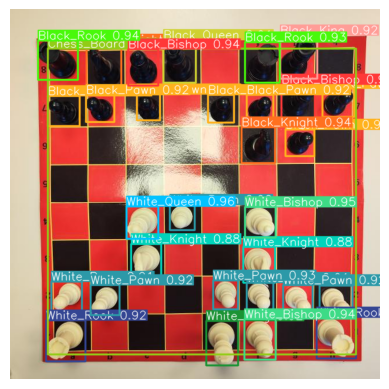

In [143]:
from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt


# Run inference on test image
results = model(['/content/Chess_Dataset_TopView-1/test/images/IMG_20240310_165829_jpg.rf.2d87379c4eea58f9bc06c617bd53d8d2.jpg'])  # results list

# Visualize the results
for i, r in enumerate(results):
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

    # Display the results using matplotlib
    plt.imshow(im_rgb)
    plt.axis('off')
    plt.show()

    # # Save results to disk
    # r.save(filename=f'results{i}.jpg')